# Examples of breakthrough curves for continuous spill problems

## (a) an infinite spill

A spill of 100 mg/L starts at $t$ = 0 and $x$ = 0. Determine the breakthrough curve at $x = 2000$ m downstream for a conservative and a nonconservative release ($k$ = 0.00005 s$^{-1}$). The stream has a velocity of 0.1 m/s and dispersion coefficient of 5 m$^2$/s

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('legend', fontsize=16)

c0 = 100
U = 0.1
E = 5
x = 2000
t = np.linspace(0.01, 12, 1000) * 3600 

Text(0, 0.5, '$c$ (mg/L)')

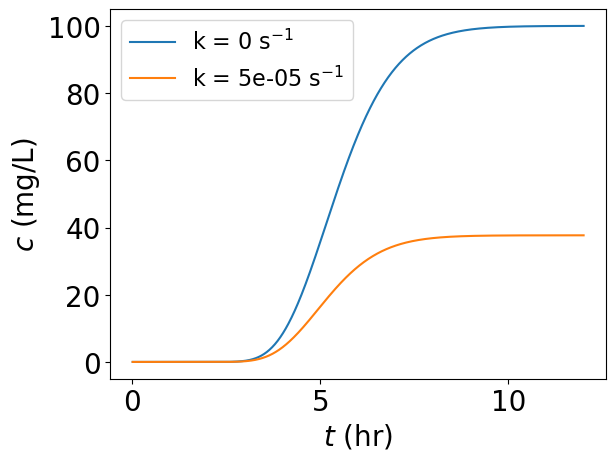

In [48]:
ki = [0, 0.00005]

for k in ki:
    eta = k*E/U**2
    Gamma = np.sqrt(1+4*eta)
    c = c0/2 * (np.exp(U*x*(1-Gamma)/(2*E))*special.erfc((x-U*t*Gamma)/(np.sqrt(4*E*t))) + np.exp(U*x*(1+Gamma)/(2*E))*special.erfc((x+U*t*Gamma)/(np.sqrt(4*E*t))))
    plt.plot(t/3600,c, label='k = '+str(k)+' s$^{-1}$')
    
plt.legend()
plt.xlabel('$t$ (hr)')
plt.ylabel('$c$ (mg/L)')

## (b) a finite-duration spill

A spill of 100 mg/L starts from $t$ = 0 at $x$ = 0 and last for 2 hours. Show breakthrough curves at $x = 100$ m and 2000 m. The stream has a velocity of 0.1 m/s and dispersion coefficient of 5 m$^2$/s

/var/folders/4c/txq1qmcs2pg0fygb8lrsf4r40000gp/T/ipykernel_97541/884699465.py:13: RuntimeWarning: divide by zero encountered in true_divide
  term1 = special.erfc((x-U*t2*Gamma)/(np.sqrt(4*E*t2))) - special.erfc((x-U*(t2-tau)*Gamma)/(np.sqrt(4*E*(t2-tau))))
/var/folders/4c/txq1qmcs2pg0fygb8lrsf4r40000gp/T/ipykernel_97541/884699465.py:14: RuntimeWarning: divide by zero encountered in true_divide
  term2 = special.erfc((x+U*t2*Gamma)/(np.sqrt(4*E*t2))) - special.erfc((x+U*(t2-tau)*Gamma)/(np.sqrt(4*E*(t2-tau))))


Text(0, 0.5, '$c$ (mg/L)')

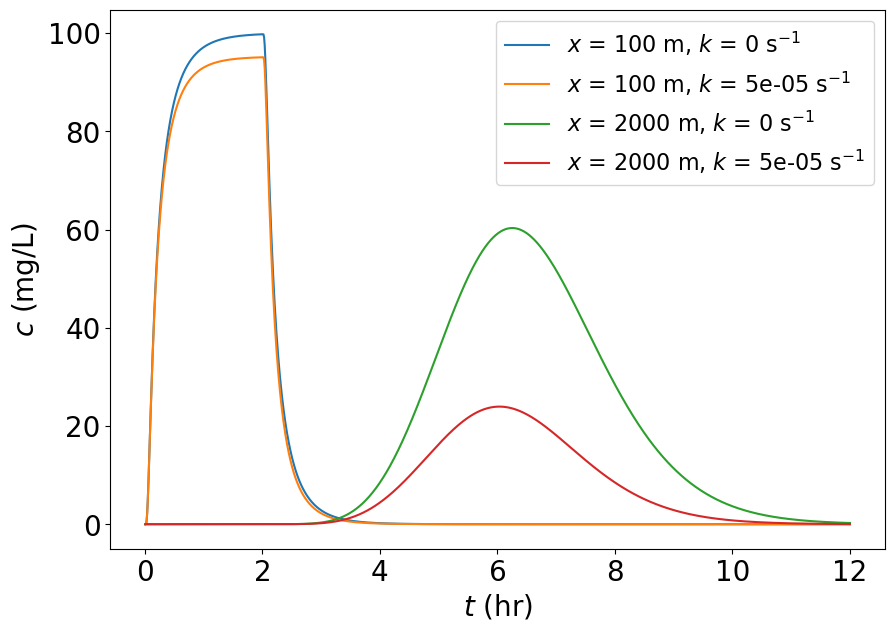

In [59]:
xi = [100, 2000]
tau = 2 * 3600
t1 = np.linspace(0.01, tau/3600, 1000) * 3600 
t2 = np.linspace(tau/3600, 12, 1000) * 3600

plt.figure(figsize=(10,7))
for x in xi:
    for k in ki:
        eta = k*E/U**2
        Gamma = np.sqrt(1+4*eta)    
        c1 = c0/2 * (np.exp(U*x*(1-Gamma)/(2*E))*special.erfc((x-U*t1*Gamma)/(np.sqrt(4*E*t1))) + np.exp(U*x*(1+Gamma)/(2*E))*special.erfc((x+U*t1*Gamma)/(np.sqrt(4*E*t1))))

        term1 = special.erfc((x-U*t2*Gamma)/(np.sqrt(4*E*t2))) - special.erfc((x-U*(t2-tau)*Gamma)/(np.sqrt(4*E*(t2-tau))))
        term2 = special.erfc((x+U*t2*Gamma)/(np.sqrt(4*E*t2))) - special.erfc((x+U*(t2-tau)*Gamma)/(np.sqrt(4*E*(t2-tau))))
        c2 = c0/2*(np.exp(U*x*(1-Gamma)/(2*E))*term1 + np.exp(U*x*(1+Gamma)/(2*E))*term2)

        t = np.hstack((t1,t2))
        c = np.hstack((c1,c2))
        plt.plot(t/3600,c, label='$x$ = ' + str(x) + ' m,' + ' $k$ = '+str(k)+' s$^{-1}$')
    
plt.legend()
plt.xlabel('$t$ (hr)')
plt.ylabel('$c$ (mg/L)')